# 5: Flight Risk Identification

In [11]:
# import libraries for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Load the sentiment-labeled data
df = pd.read_csv("test_labeled_1.csv")
df["date"] = pd.to_datetime(df["date"])

# Filter only negative messages
Negative_messages = df[df["sentiment"] == "Negative"].copy()

# Sort for rolling window
Negative_messages.sort_values(by=["from", "date"], inplace=True)

# Initialize set for flagged employees
flight_risks = set()

# Rolling window detection 30 day span
for emp_id, group in Negative_messages.groupby("from"):
    dates = group["date"].reset_index(drop=True)
    for i in range(len(dates)):
        count = 1  # Include current message
        for j in range(i + 1, len(dates)):
            delta = (dates[j] - dates[i]).days
            if delta <= 30:
                count += 1
                if count >= 4:
                    flight_risks.add(emp_id)
                    break
            else:
                break
        if emp_id in flight_risks:
            break  # stop processing further

# Output result saved in flight_risk_data
flight_risk_data = pd.DataFrame({"employee_id": list(flight_risks)})
print(flight_risk_data.head(10))

                   employee_id
0         sally.beck@enron.com
1        john.arnold@enron.com
2       don.baughman@enron.com
3  bobette.riner@ipgdirect.com
4          eric.bass@enron.com
5      johnny.palmer@enron.com
6      rhonda.denton@enron.com
7      lydia.delgado@enron.com


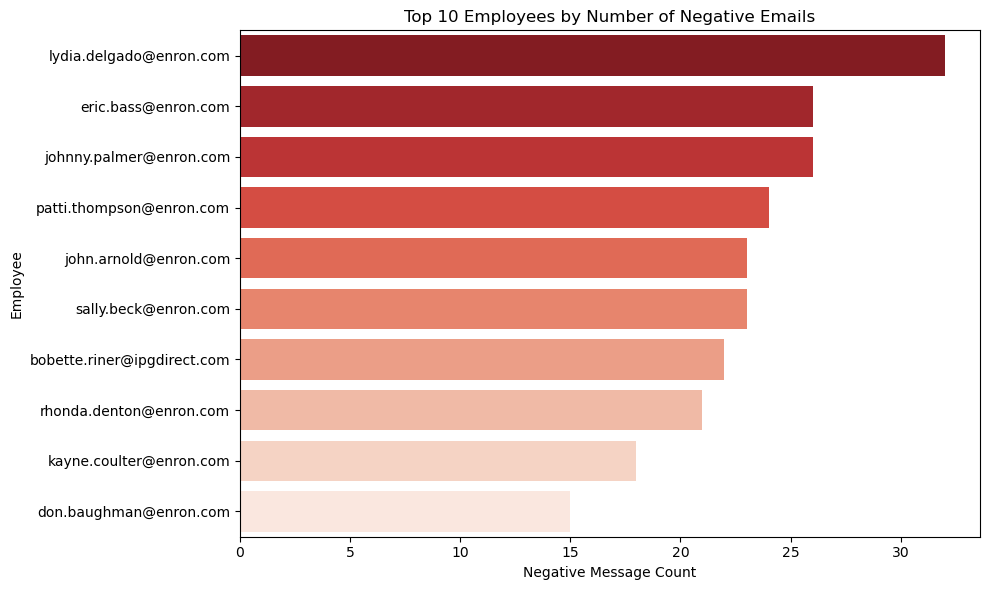

In [13]:
# Count negative messages per employee
neg_counts = Negative_messages["from"].value_counts().reset_index()
neg_counts.columns = ["employee", "negative_message_count"]

plt.figure(figsize=(10, 6))
sns.barplot(data=neg_counts, x="negative_message_count", y="employee", palette="Reds_r")
plt.title("Top 10 Employees by Number of Negative Emails")
plt.xlabel("Negative Message Count")
plt.ylabel("Employee")
plt.tight_layout()
plt.savefig("top_negative_employees.png")
plt.show()

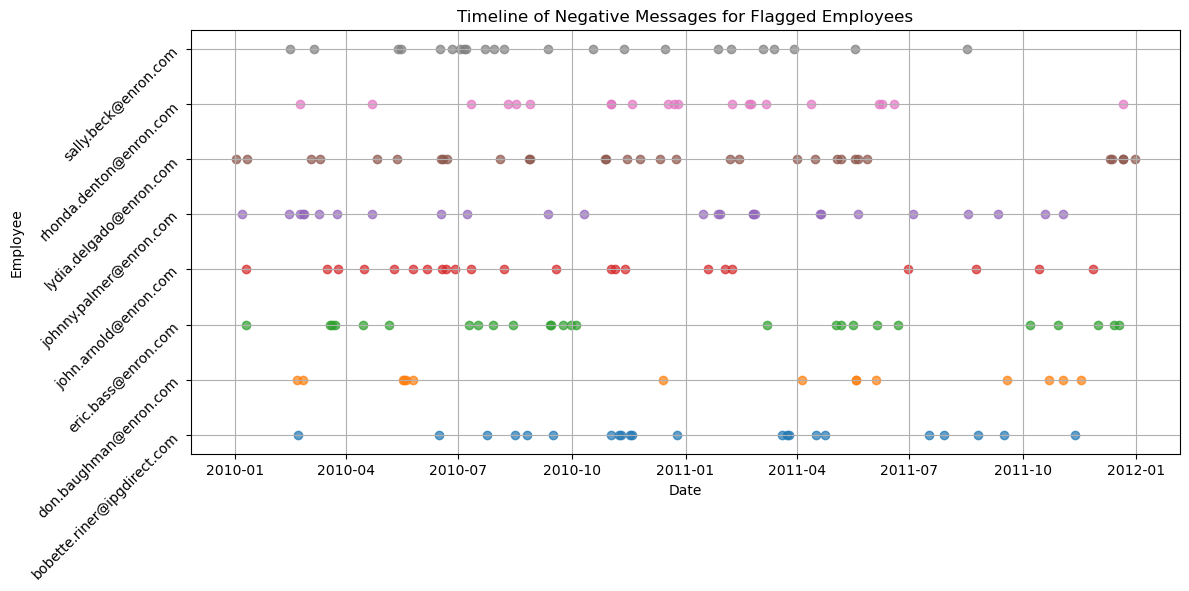

<Figure size 640x480 with 0 Axes>

In [14]:
# Plot timeline of negative messages for flagged employees
flagged_data = Negative_messages[Negative_messages["from"].isin(flight_risks)]

plt.figure(figsize=(12, 6))
for emp in flagged_data["from"].unique():
    emp_data = flagged_data[flagged_data["from"] == emp]
    plt.scatter(emp_data["date"], [emp]*len(emp_data), label=emp, alpha=0.7)

plt.title("Timeline of Negative Messages for Flagged Employees")
plt.xlabel("Date")
plt.ylabel("Employee")
plt.yticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()
plt.savefig("Flagged Employees.png")

In [15]:
flight_risk_data.to_csv("flight_risk_employees.csv", index=False)
print("Flight risk employee list saved to 'flight_risk_employees.csv'")

Flight risk employee list saved to 'flight_risk_employees.csv'
